# MCDWT Compression Rate Evaluation

Evalutation of the compression rate of MCDWT algorythm executing it for 1,2,3,5,10,20 iterations for 9 images.

## Clear /tmp directory
### set clear=true to clear directory

In [1]:
%%script bash
clear=true
if [ $clear == true ]
then
    echo "Clear the folder"
    
	rm -r /tmp/it* 2> /dev/null
    
	rm -r /tmp/*.png 2> /dev/null
    
	rm -r /tmp/images 2> /dev/null
    
	rm -r /tmp/test_video 2> /dev/null

    echo "if you don't put linebreaks ipython will show error"
    
else
	echo "Do not clear the folder"
    echo $some_variable
fi

Clear the folder
if you don't put linebreaks ipython will show error


# Download the file

In [2]:
%%bash --no-raise-error
#set variables
file="/tmp/test_video"
from_url="https://media.xiph.org/video/derf/y4m/hall_objects_qcif.y4m"

#download file if not present in folder
if [ -f "$file" ]
then
	echo "File $file is already downloaded."
else
	echo "Downloading: $file"
	echo "please wait until the file is downloaded"
	wget -q -c --show-progress -O $file $from_url
fi

Downloading: /tmp/test_video
please wait until the file is downloaded



     0K .......... .......... .......... .......... ..........  0%  201K 61s
    50K .......... .......... .......... .......... ..........  0%  404K 45s
   100K .......... .......... .......... .......... ..........  1% 16,7M 30s
   150K .......... .......... .......... .......... ..........  1%  412K 30s
   200K .......... .......... .......... .......... ..........  2% 16,3M 24s
   250K .......... .......... .......... .......... ..........  2% 18,5M 20s
   300K .......... .......... .......... .......... ..........  2% 13,9M 17s
   350K .......... .......... .......... .......... ..........  3%  437K 18s
   400K .......... .......... .......... .......... ..........  3% 13,9M 16s
   450K .......... .......... .......... .......... ..........  4% 15,9M 15s
   500K .......... .......... .......... .......... ..........  4% 14,8M 13s
   550K .......... .......... .......... .......... ..........  4% 14,4M 12s
   600K .......... .......... .......... .......... ..........  5% 18,1M 11

# Extract frames from the file

In [3]:
%%bash
folder='/tmp/images/'
file="/tmp/test_video"
rm -r $folder 2> /dev/null
mkdir $folder
ffmpeg -hide_banner -loglevel info -i $file -vframes 9 $folder%03d.png &

Input #0, yuv4mpegpipe, from '/tmp/test_video':
  Duration: 00:00:11.01, start: 0.000000, bitrate: 9116 kb/s
    Stream #0:0: Video: rawvideo (I420 / 0x30323449), yuv420p, 176x144, SAR 128:117 DAR 1408:1053, 29.97 fps, 29.97 tbr, 29.97 tbn, 29.97 tbc
Output #0, image2, to '/tmp/images/%03d.png':
  Metadata:
    encoder         : Lavf56.40.101
    Stream #0:0: Video: png, rgb24, 176x144 [SAR 128:117 DAR 1408:1053], q=2-31, 200 kb/s, 29.97 fps, 29.97 tbn, 29.97 tbc
    Metadata:
      encoder         : Lavc56.60.100 png
Stream mapping:
  Stream #0:0 -> #0:0 (rawvideo (native) -> png (native))
Press [q] to stop, [?] for help
frame=    9 fps=0.0 q=-0.0 Lsize=N/A time=00:00:00.30 bitrate=N/A    
video:505kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


# Show extracted frames

In [4]:
%%bash
folder='/tmp/images/'
ls -la $folder

total 540
drwxrwxr-x  2 usuario usuario  4096 ene 29 11:59 .
drwxrwxrwt 20 root    root     4096 ene 29 11:59 ..
-rw-rw-r--  1 usuario usuario 57328 ene 29 11:59 001.png
-rw-rw-r--  1 usuario usuario 57546 ene 29 11:59 002.png
-rw-rw-r--  1 usuario usuario 57470 ene 29 11:59 003.png
-rw-rw-r--  1 usuario usuario 57643 ene 29 11:59 004.png
-rw-rw-r--  1 usuario usuario 57501 ene 29 11:59 005.png
-rw-rw-r--  1 usuario usuario 57318 ene 29 11:59 006.png
-rw-rw-r--  1 usuario usuario 57410 ene 29 11:59 007.png
-rw-rw-r--  1 usuario usuario 57398 ene 29 11:59 008.png
-rw-rw-r--  1 usuario usuario 57538 ene 29 11:59 009.png


# Rename files 1..10 -> 0..9

In [5]:
%%bash
folder='/tmp/images/'
for i in $(seq 1 9);
do
	a=$i	
	a=`printf %03d $a`
	a="$folder$a.png"
    
	b=$((10#$i-1))
	b=`printf %03d $b`
    b="$folder$b.png"
	mv $a $b
done
ls -la $folder

total 540
drwxrwxr-x  2 usuario usuario  4096 ene 29 11:59 .
drwxrwxrwt 20 root    root     4096 ene 29 11:59 ..
-rw-rw-r--  1 usuario usuario 57328 ene 29 11:59 000.png
-rw-rw-r--  1 usuario usuario 57546 ene 29 11:59 001.png
-rw-rw-r--  1 usuario usuario 57470 ene 29 11:59 002.png
-rw-rw-r--  1 usuario usuario 57643 ene 29 11:59 003.png
-rw-rw-r--  1 usuario usuario 57501 ene 29 11:59 004.png
-rw-rw-r--  1 usuario usuario 57318 ene 29 11:59 005.png
-rw-rw-r--  1 usuario usuario 57410 ene 29 11:59 006.png
-rw-rw-r--  1 usuario usuario 57398 ene 29 11:59 007.png
-rw-rw-r--  1 usuario usuario 57538 ene 29 11:59 008.png


# 1 iteración

## Prepare frames for processing

In [6]:
%%bash
folder="/tmp/images/"
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/
ls -la /tmp/*.png

-rw-rw-r-- 1 usuario usuario 57328 ene 29 11:59 /tmp/000.png
-rw-rw-r-- 1 usuario usuario 57546 ene 29 11:59 /tmp/001.png
-rw-rw-r-- 1 usuario usuario 57470 ene 29 11:59 /tmp/002.png
-rw-rw-r-- 1 usuario usuario 57643 ene 29 11:59 /tmp/003.png
-rw-rw-r-- 1 usuario usuario 57501 ene 29 11:59 /tmp/004.png
-rw-rw-r-- 1 usuario usuario 57318 ene 29 11:59 /tmp/005.png
-rw-rw-r-- 1 usuario usuario 57410 ene 29 11:59 /tmp/006.png
-rw-rw-r-- 1 usuario usuario 57398 ene 29 11:59 /tmp/007.png
-rw-rw-r-- 1 usuario usuario 57538 ene 29 11:59 /tmp/008.png


# Execute MDWT and MCDWT afterwards

In [7]:
num_imgs=9
predictor=1
iterations=1
folder="/tmp/images/"
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

# copy compressed results to evaluate later

In [8]:
%%bash
iterations=1
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# 2 iteraciones

In [9]:
%%bash
folder='/tmp/images/'
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/

In [10]:
num_imgs=9
predictor=1
iterations=2
folder='/tmp/images/'
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

In [11]:
%%bash
iterations=2
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# 3 iteraciónes

In [12]:
%%bash
folder='/tmp/images/'
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/

In [13]:
num_imgs=9
predictor=1
iterations=3
folder='/tmp/images/'
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

In [14]:
%%bash
iterations=3
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# 5 iterationes

In [15]:
%%bash
folder='/tmp/images/'
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/

In [16]:
num_imgs=9
predictor=1
iterations=5
folder='/tmp/images/'
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

In [17]:
%%bash
iterations=5
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# 10 iteraciónes

In [18]:
%%bash
folder='/tmp/images/'
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/

In [19]:
num_imgs=9
predictor=1
iterations=10
folder='/tmp/images/'
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

In [20]:
%%bash
iterations=10
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# 20 iteraciones

In [21]:
%%bash
folder='/tmp/images/'
rm /tmp/*.png  2> /dev/null
cp $folder*.png /tmp/

In [22]:
num_imgs=9
predictor=1
iterations=20
folder='/tmp/images/'
!python3 -O MDWT.py -N $num_imgs -p /tmp/ 
!python3 -O MCDWT.py -N $num_imgs -P $predictor -p /tmp/ -T $iterations

In [23]:
%%bash
iterations=20
folder="/tmp/it$iterations"
rm -r $folder 2> /dev/null
mkdir $folder
cp /tmp/*.png $folder
rm $folder/???.png

# plot

-------------------------------------------------------------------------------------------------------------------------
iteraciones: 
[1, 2, 3, 5, 10, 20]

ratios de compresion: 
['1.0000', '1.0000', '1.0000', '1.0000', '1.0000', '1.0000']

tamaño de imagenes comprimidas: 
[0, 0, 0, 0, 0, 0]

tamaño de imagenes original: 
[505, 505, 505, 505, 505, 505]



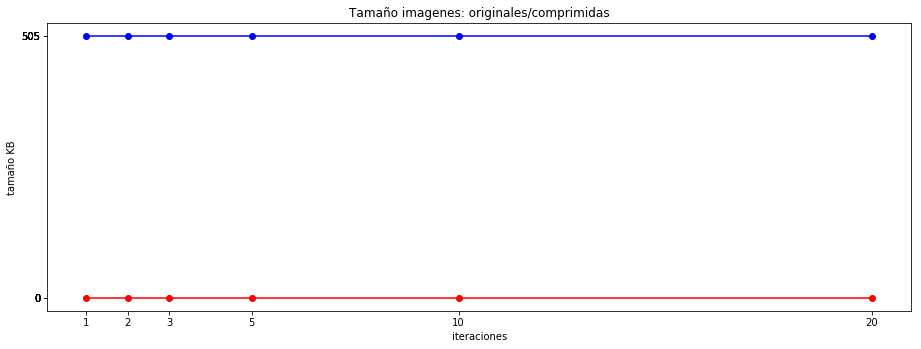

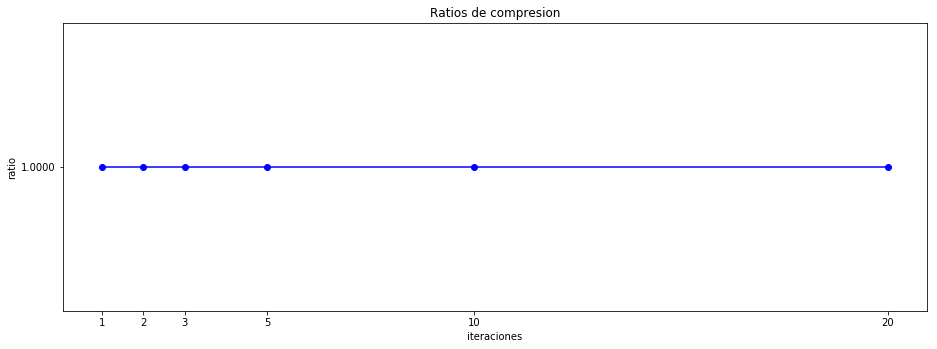

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import math
import os
def get_size(start_path = '.'):
    #total size of folder in Kbytes
    total_size = 0
    for dirpath, dirnames, filenames in os.walk(start_path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            # skip if it is symbolic link
            if not os.path.islink(fp):
                total_size += os.path.getsize(fp)

    return (int) (total_size/1024)
fp="/tmp/it1"

%matplotlib inline
# x - numero de iteraciones
x=[1,2,3,5,10,20] 
# y - tamaño imagenes comprimidas
y=[get_size("/tmp/it1"),get_size("/tmp/it2"),get_size("/tmp/it3"),get_size("/tmp/it5"),get_size("/tmp/it10"),get_size("/tmp/it20")]
a = get_size("/tmp/images/")
# y1 - tamaño imagenes sin comprimir 
y1 =[a,a,a,a,a,a]
# z - ratio de compresión
z = []
for i in range(0,len(x)):
    z.append("{0:.4f}".format(1-(y[i]/y1[i])))
print('-------------------------------------------------------------------------------------------------------------------------')
print('iteraciones: ')
print(str(x)+'\n')
print("ratios de compresion: ")
print(str(z)+'\n')

fig1=plt.figure()
ax=fig1.add_axes([0,0,2,1])
ax.set_title("Tamaño imagenes: originales/comprimidas")
ax.set_xlabel("iteraciones")
ax.set_ylabel("tamaño KB")
ax.set_xticks(x)
ax.set_yticks(y+y1)
ax.plot(x,y,'-bo',color='r',label='data1')
ax.plot(x,y1,'-bo',color='b',label='data2')

fig2=plt.figure()
ax1=fig2.add_axes([0,0,2,1])
ax1.set_title('Ratios de compresion')
ax1.set_xlabel("iteraciones")
ax1.set_ylabel("ratio")
ax1.set_xticks(x)
ax1.plot(x,z,'-bo',color='b')

print("tamaño de imagenes comprimidas: ")
print(str(y)+'\n')
print("tamaño de imagenes original: ")
print(str(y1)+'\n')
